# Regressão de Floresta Aleatória

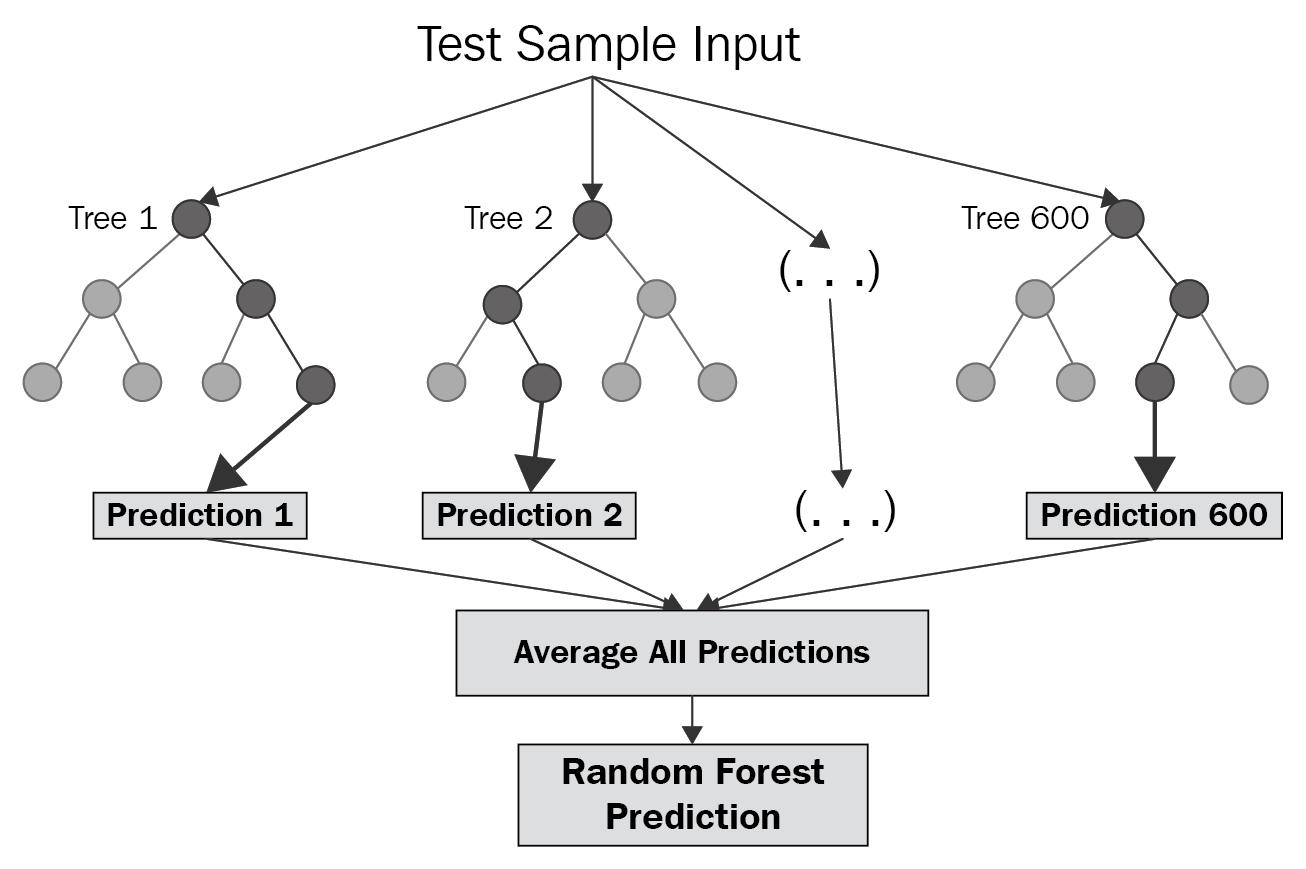

## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
    
from functools import wraps

## Carregando Base de Dados

In [2]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 171 (delta 64), reused 40 (delta 4), pack-reused 0
Receiving objects: 100% (171/171), 1.24 MiB | 6.81 MiB/s, done.
Resolving deltas: 100% (64/64), done.


## Funções de Pré-Processamento

In [3]:
def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values

    return X, y, baseDeDados

def fillMissingData(X, inicioColuna, fimColuna):
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])

    return X

#só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]

    return X

def splitTrainTestSets(X, y, testSize):
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)

    return XTrain, XTest, yTrain, yTest

def computeScaling(X):
    scale = StandardScaler()
    X = scale.fit_transform(X)

    return X, scale

## Funções Auxiliares

In [4]:
def showplot(XPoints, yPoints, XLine, yLine):
    plt.scatter(XPoints, yPoints, color='r')
    plt.plot(XLine, yLine, color='b')
    plt.title('Comparando pontos reais com reta produzida pela Regressão de Floresta Aleatória.')
    plt.xlabel('Experiência em anos')
    plt.ylabel('Salário')
    plt.show()

## Regressão de Floresta Aleatória

In [5]:
def computeRandomForestRegressionModel(X, y, numberOfTrees):
    regressor = RandomForestRegressor(n_estimators=numberOfTrees)
    regressor.fit(X, y)

    return regressor

def runRandomForestRegressionExample(filename, numberOfTrees=5000):
    start_time = time.time()
    X, y, csv = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print('Load Dataset: %.2f' % elapsed_time, 'segundos.')

    start_time = time.time()
    rfModel = computeRandomForestRegressionModel(X, y, numberOfTrees)
    elapsed_time = time.time() - start_time
    print('Compute Random Forest Regression: %.2f' % elapsed_time, 'segundos.')

    showplot(X, y, X, rfModel.predict(X))

    print('\nGráfico usando GRID\n')

    XGrid = np.arange(min(X), max(X), 0.01)
    XGrid = XGrid.reshape((len(XGrid), 1))
    showplot(X, y, XGrid, rfModel.predict(XGrid))

Load Dataset: 0.02 segundos.
Compute Random Forest Regression: 5.53 segundos.


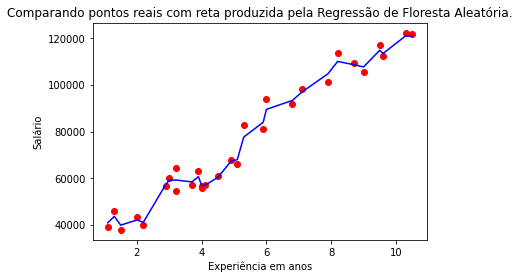


Gráfico usando GRID



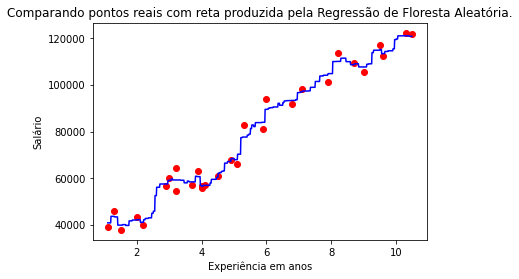

In [6]:
runRandomForestRegressionExample('MLUD/Aula10/salary.csv')